<br><br>
<font size='6'><b>Fixed-Point Iteration</b></font>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Source

- By Prof. David J. Malan from Harvard University
- By Prof. Erik Demaine from MIT online lecture

Table of Contents
<div id="toc"></div>

# 1. Fixed-Point Iteration

## 1.1. Numerical approach

For the given equation:

$$f(x) = 0 \implies x = g(x)$$

Remark: always achievable 

$$
\begin{align*}
x & = f(x) + x = g(x)\\
x &= -f(x) + x = g(x)
\end{align*}
$$

Goal: _numerically_ find the solution of $x = g(x)$

Main idea: 

- Make a guess of the solution, $x_k$

- If $g(x_k)$ is 'nice', then hopefully, $g(x_k)$ will be closer to the answer. If so, we can iterate

__Iteration algorithm__

1. choose an initial point $x_0$
2. Do the iteration $x_{k+1} = g(x_k)$ until meeting stopping criteria


__Convergence check (or analysis)__

$\quad$ Let $r$ be the exact solution, $r = g(r)$

$$
\begin{array}{l}
x_{k+1} &= g(x_k)\\
\text{error} :&\quad e_k &= x_k - r\\
&\quad e_{k+1} &= x_{k+1} - r = g(x_k) - g(r)\\
&&= g'(\eta)(x_k - r) = g'(\eta)e_k , \quad \eta \in (x_k, r)\\ \\
&\implies \lvert e_{k+1}\rvert &\leq \lvert g'(\eta)\rvert \lvert e_k \rvert\\
\end{array}
$$

<br>
$$\text{If } \lvert g'(\eta) \rvert <1, \text{error decreases (iteration converges)}$$



__1) Example of $x = \cos(x)$__

In [4]:
# Computational Thinking on how to calculate cos(x) = x

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

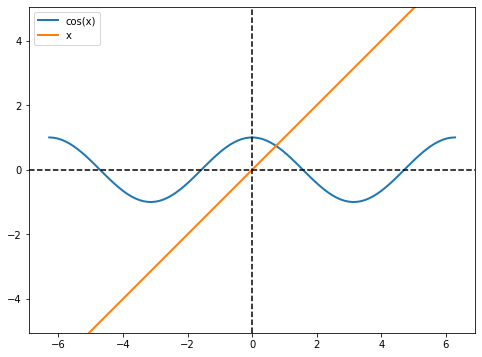

In [2]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.cos(x)

plt.figure(figsize = (8,6))
plt.plot(x, y, linewidth = 2)
plt.plot(x, x, linewidth = 2)
# plt.xlim(-2*np.pi, 2*np.pi)
plt.axvline(x=0, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')
plt.legend(['cos(x)','x'])
plt.axis('equal')
plt.ylim([-1,1])
plt.show()

In [5]:
# naive approach
# print numerical answer by fixed point iter.

x = 0.3
print (np.cos(x))
print (np.cos(np.cos(x)))
print (np.cos(np.cos(np.cos(x))))
print (np.cos(np.cos(np.cos(np.cos(x)))))
print (np.cos(np.cos(np.cos(np.cos(np.cos(x))))))
print (np.cos(np.cos(np.cos(np.cos(np.cos(np.cos(x)))))))
print (np.cos(np.cos(np.cos(np.cos(np.cos(np.cos(np.cos(x))))))))

0.955336489125606
0.5773340444711864
0.8379206831271269
0.6690097308223832
0.7844362247423562
0.7077866472756374
0.7598027552852303


In [3]:
# better way
# use "for"
x = 10
for i in range(10):
    x = np.cos(x)
    
print (x)

0.7361561485109404


In [5]:
# better way
# use array

x = np.zeros((24, 1))
x[0] = 0.3

for i in range(23):
    x[i+1] = np.cos(x[i])
    
print (x)

[[0.3       ]
 [0.95533649]
 [0.57733404]
 [0.83792068]
 [0.66900973]
 [0.78443622]
 [0.70778665]
 [0.75980276]
 [0.72497188]
 [0.74851807]
 [0.73269821]
 [0.74337234]
 [0.73619044]
 [0.74103194]
 [0.73777234]
 [0.73996881]
 [0.73848959]
 [0.73948617]
 [0.73881493]
 [0.73926712]
 [0.73896253]
 [0.73916771]
 [0.73902951]
 [0.7391226 ]]


__2) example of $\sqrt{2} \;(x^2 = 2)$__

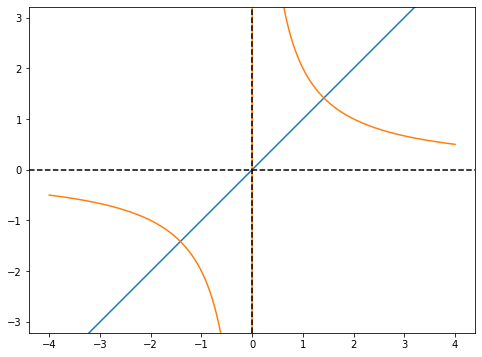

In [6]:
# plot y = x and y = 2/x
x = np.linspace(-4,4,200)
y1 = x
y2 = 2/x

plt.figure(figsize = (8,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(x=0, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')

plt.axis('equal')
plt.ylim([-1,1])
plt.show()

In [19]:
# Use an idea of a fixed point
# use "for" and "x = 2/x"

x = 2
for i in range(10):
    x = 2/x
    print(x)

1.0
2.0
1.0
2.0
1.0
2.0
1.0
2.0
1.0
2.0


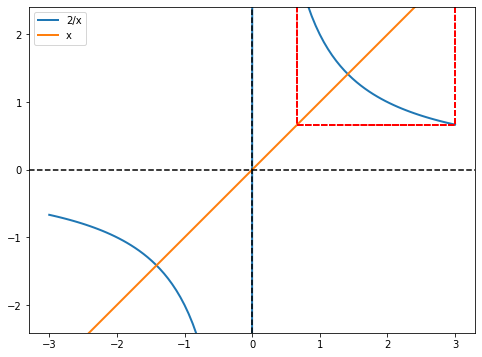

In [7]:
n_iter = 10

x = np.linspace(-3, 3, 100)
y = 2/x

def func(x):
    return 2/x

x_nu = np.zeros((n_iter,1))
x_nu[0] = 3
for i in range(n_iter-1):
    x_nu[i+1] = 2/x_nu[i]

traj_x = []
traj_y = []
for i in range(n_iter):
    traj_x.append(x_nu[i])
    traj_y.append(func(x_nu[i]))
    traj_x.append(func(x_nu[i]))
    traj_y.append(func(x_nu[i]))
    
plt.figure(figsize = (8,6))
plt.plot(x, y, linewidth = 2)
plt.plot(x, x, linewidth = 2)
plt.plot(traj_x,traj_y,'r--')
plt.axvline(x=0, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')
plt.legend(['2/x','x'])
plt.axis('equal')
plt.ylim([-1,1])
plt.show()

In [ ]:
# plot y = x and y = (x + 2/x)/2
# plot y = x and y = 2/x
# plot trajectory of iteration value

x = np.linspace(-4, 4, 100)
y = (x + 2/x)/2

plt.figure(figsize = (8,6))
plt.axvline(x=0, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')
plt.axis('equal')
plt.ylim([-1,1])
plt.show()

In [ ]:
# How to overcome 
# Use an idea of a fixed point +   kind of *|damping|*
# hint: x = (x+2/x)/2
n_iter = 10

x = np.linspace(-4, 4, 100)
y = (x + 2/x)/2


In [ ]:
# plot y = x and y = (x + 2/x)/2
# plot trajectory of iteration value
    

plt.figure(figsize = (8,6))
plt.axvline(x=0, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')
plt.axis('equal')
plt.ylim([-1,1])
plt.show()

Think about why it gives different results.

## 1.2. System of Linear Equations

<br>

$$
\begin{align*}
4x_1 - x_2 + x_3 &= 7 \\
4x_1 - 8x_2 + x_3 &= -21  \\
-2x_1 + x_2 + 5x_3 &= 15 
\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate x
# use matrix inverse

A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
B = np.array([[]])

This solution only possible for small size problems. There are many iterative methods for large problems.

$$
\begin{align*}
4x_1 - x_2 + x_3 &= 7 &  x_1 &= \frac{1}{4}x_2 - \frac{1}{4}x_3 + \frac{7}{4}\\
4x_1 - 8x_2 + x_3 &= -21  & \implies \quad x_2 &= \frac{1}{2}x_1 + \frac{1}{8}x_3 + \frac{21}{8}\\
-2x_1 + x_2 + 5x_3 &= 15 & x_3 &= \frac{2}{5}x_1 - \frac{1}{5}x_2 + \frac{15}{5}
\end{align*}
$$

<br>

- In a matrix form

<br>

$$\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
=
\begin{bmatrix}
0 &\frac{1}{4} & - \frac{1}{4}\\
\frac{1}{2} & 0 & \frac{1}{8}\\
\frac{2}{5} & -\frac{1}{5} & 0\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
+
\begin{bmatrix}
\frac{7}{4}\\
\frac{21}{8}\\
3\\
\end{bmatrix}
$$

<br>

- iteration

<br>

$$
\begin{bmatrix}
x_1^{(k+1)}\\
x_2^{(k+1)}\\
x_3^{(k+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
0 &\frac{1}{4} & - \frac{1}{4}\\
\frac{1}{2} & 0 & \frac{1}{8}\\
\frac{2}{5} & -\frac{1}{5} & 0\\
\end{bmatrix}
\begin{bmatrix}
x_1^{(k)}\\
x_2^{(k)}\\
x_3^{(k)}\\
\end{bmatrix}
+
\begin{bmatrix}
\frac{7}{4}\\
\frac{21}{8}\\
3\\
\end{bmatrix}
$$

In [ ]:
# use Iterative way



__Remark) try this one__

$$
\begin{align*}
x_1 &= -3x_1 + x_2 - x_3 + 7\\
x_2 &= 4x_1 - 7x_2 + x_3 + 21\\
x_3 &= 2x_1 - x_2 + -4x_3 + 15
\end{align*}
$$

<br>

$$\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
\leftarrow
\begin{bmatrix}
-3 & 1 & -1 \\
4 & -7 & 1 \\
2 & -1 & -4
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
+
\begin{bmatrix}
7\\
21\\
15\\
\end{bmatrix}
$$

<br>

**Convergence check**

<br>
$$x \leftarrow Ax + b$$

<br>

$$\begin{align*}
x_{k+1} &= Ax_k +b\\
&= A(Ax_{k-1} + b) + b = A^2X_{k-1} + Ab + b\\
& \vdots\\
&= A^{k+1}x_0 + A^kb + \cdots + Ab + b
\end{align*}$$

In [ ]:
# Calculate x
# use Iterative way
# think about why this one does not work


In [ ]:
# stability, check eigenvalue of A

A = np.array(([[3, 1, -1 ], 
               [4, 7, 1], 
               [2, -1, -4]]))



In [ ]:
# stability, check eigenvalue of A 

A = np.array(([[0, 1/4, -1/4 ], 
               [4/8, 0, 1/8], 
               [2/5, -1/5, 0]]))



In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')